In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [5]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
15/15 [==============================] - 2s 5ms/step - loss: 5.5693 - accuracy: 0.0375
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 5.5479 - accuracy: 0.0486
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 5.4995 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 5.3549 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 5.1598 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 5.0825 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 5.0408 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 4ms/step - loss: 5.0085 - accuracy: 0.0662
Epoch 9/500
15/15 [==============================] - 0s 4ms/step - loss: 4.9782 - accuracy: 0.0618
Epoch 10/500
15/15 [==============================] - 0s 4ms/step - loss: 4.9422 - accuracy: 0.0662
Epoch 11/

15/15 [==============================] - 0s 4ms/step - loss: 2.2044 - accuracy: 0.6026
Epoch 84/500
15/15 [==============================] - 0s 4ms/step - loss: 2.1770 - accuracy: 0.6181
Epoch 85/500
15/15 [==============================] - 0s 4ms/step - loss: 2.1468 - accuracy: 0.6137
Epoch 86/500
15/15 [==============================] - 0s 4ms/step - loss: 2.1311 - accuracy: 0.6269
Epoch 87/500
15/15 [==============================] - 0s 4ms/step - loss: 2.1113 - accuracy: 0.6380
Epoch 88/500
15/15 [==============================] - 0s 4ms/step - loss: 2.1070 - accuracy: 0.6247
Epoch 89/500
15/15 [==============================] - 0s 4ms/step - loss: 2.0728 - accuracy: 0.6402
Epoch 90/500
15/15 [==============================] - 0s 4ms/step - loss: 2.0454 - accuracy: 0.6490
Epoch 91/500
15/15 [==============================] - 0s 4ms/step - loss: 2.0166 - accuracy: 0.6468
Epoch 92/500
15/15 [==============================] - 0s 4ms/step - loss: 1.9883 - accuracy: 0.6446
Epoch 93/500


15/15 [==============================] - 0s 5ms/step - loss: 0.9343 - accuracy: 0.8808
Epoch 165/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9353 - accuracy: 0.8808
Epoch 166/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9063 - accuracy: 0.8830
Epoch 167/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8855 - accuracy: 0.8918
Epoch 168/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8669 - accuracy: 0.8962
Epoch 169/500
15/15 [==============================] - 0s 4ms/step - loss: 0.8551 - accuracy: 0.8918
Epoch 170/500
15/15 [==============================] - 0s 4ms/step - loss: 0.8468 - accuracy: 0.8940
Epoch 171/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8403 - accuracy: 0.8985
Epoch 172/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8332 - accuracy: 0.8940
Epoch 173/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8272 - accuracy: 0.8940
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.4071 - accuracy: 0.9448
Epoch 246/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.9492
Epoch 247/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3991 - accuracy: 0.9514
Epoch 248/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.9470
Epoch 249/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.9492
Epoch 250/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3878 - accuracy: 0.9492
Epoch 251/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3836 - accuracy: 0.9514
Epoch 252/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3799 - accuracy: 0.9492
Epoch 253/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3773 - accuracy: 0.9514
Epoch 254/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3735 - accuracy: 0.9536
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.2253 - accuracy: 0.9536
Epoch 327/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 0.9536
Epoch 328/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9514
Epoch 329/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2203 - accuracy: 0.9492
Epoch 330/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2194 - accuracy: 0.9514
Epoch 331/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2177 - accuracy: 0.9514
Epoch 332/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2166 - accuracy: 0.9536
Epoch 333/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.9514
Epoch 334/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2139 - accuracy: 0.9492
Epoch 335/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2128 - accuracy: 0.9492
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.1552 - accuracy: 0.9470
Epoch 408/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.9470
Epoch 409/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9338
Epoch 410/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1674 - accuracy: 0.9514
Epoch 411/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1669 - accuracy: 0.9448
Epoch 412/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1983 - accuracy: 0.9404
Epoch 413/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2060 - accuracy: 0.9360
Epoch 414/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 0.9227
Epoch 415/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.9360
Epoch 416/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.9426
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.9514
Epoch 489/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1231 - accuracy: 0.9492
Epoch 490/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1226 - accuracy: 0.9492
Epoch 491/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1225 - accuracy: 0.9470
Epoch 492/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1230 - accuracy: 0.9492
Epoch 493/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1220 - accuracy: 0.9514
Epoch 494/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1214 - accuracy: 0.9492
Epoch 495/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1225 - accuracy: 0.9492
Epoch 496/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1215 - accuracy: 0.9514
Epoch 497/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1209 - accuracy: 0.9448
Epoc

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

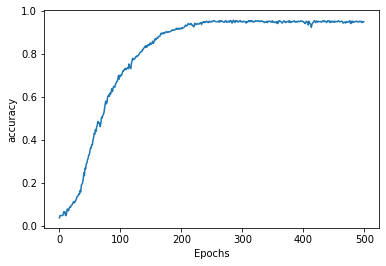

In [7]:
plot_graphs(history, 'accuracy')


In [8]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)[0]
	idxmax = np.where(predicted == np.amax(predicted))[0][0]
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == idxmax:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin were doing all to give kinds as too wink a give again again again again again again her a call call call call rose a call hall hall hall hall call call hall call hall hall ten wall ladies taras hall hall hall hall hall hall hall glisten stepped in again again again me them me me a hadnt a pound pound pound pound party a call call call call call rose a jig hall hall jig relations again again again i hall hall hall hall hall glisten suppose again i hall hall hall hall hall glisten suppose again i
